# **Kelompok 5 SE - Object Detection BISINDO (YOLOv5)**

Anggota Kelompok 5 LC75:
- Muhammad Daffa Alandra // 2602153373
- Rafli Ardhyanto Tandi Rongre // 2702361210
- Imanuel Adif Luhur Kuspratama // 2501997331
- Gabriel Jehuda // 2440022681

## **SignIt! | Real-time Sign Language Translator**

Projek kami...

### **1. DATASET - BISINDO**

**Jumlah Images**: 560 Total

**Dataset Split** = 80% Train 20% Test
- Training Set // 448 Images
- Testing Set // 112 Images

**Classes** *(Kamus Bahasa / Abjad)*
- A
- B
- C
- D
- E
- F
- G
- H
- I
- J
- K
- L
- M
- N
- O
- P
- Q
- R
- S
- T
- U
- V
- W
- X
- Y
- Z
- Halo
- NamaAku

### **2. Application Dependencies / Data Preparation**

Cek kalau GPU terkoneksi dengan runtime sesi ini!

In [1]:
!nvidia-smi

Sat May 10 10:47:04 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Mengambil cloning arsitektur YOLOv5 dari Github.

In [2]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17430, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 17430 (delta 74), reused 28 (delta 28), pack-reused 17331 (from 2)
Receiving objects: 100% (17430/17430), 16.30 MiB | 13.59 MiB/s, done.
Resolving deltas: 100% (11951/11951), done.
/content/yolov5


Mengunduh `requirements.txt` dari folder YOLOv5!

In [3]:
!pip install -qr requirements.txt
import torch

from IPython.display import Image, clear_output  # to display images
#from utils.google_utils import gdrive_download  # to download models/datasets

#clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.2 MB/s eta 0:00:00
Setup complete. Using torch 2.6.0+cu124 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15095MB, multi_p

Data Loading (.ZIP)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import zipfile

zip_path = "/content/drive/MyDrive/dataset-bisindo.zip"
extract_to = "/content/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

In [6]:
%cat /content/data.yaml

train: final_data/train/images
val: final_data/test/images

nc: 28
names: ['Y', 'E', 'O', 'F', 'P', 'Z', 'G', 'Q', 'Halo', 'H', 'R', 'NamaAku', 'I', 'S', 'J', 'T', 'A', 'K', 'U', 'B', 'L', 'V', 'C', 'M', 'W', 'D', 'N', 'X']


In [7]:
import yaml
with open("/content/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [8]:
num_classes

'28'

### **3. Training, Testing, Validating**

Kita menggunakan config YOLOv5 small ini:

In [9]:
%cat /content/yolov5/models/yolov5s.yaml

# Ultralytics 🚀 AGPL-3.0 License - https://ultralytics.com/license

# Parameters
nc: 80 # number of classes
depth_multiple: 0.33 # model depth multiple
width_multiple: 0.50 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, 

In [10]:
yaml_text = """
train: /content/train/images
val: /content/test/images

nc: 28
names: ['Y', 'E', 'O', 'F', 'P', 'Z', 'G', 'Q', 'Halo', 'H', 'R', 'NamaAku', 'I', 'S', 'J', 'T', 'A', 'K', 'U', 'B', 'L', 'V', 'C', 'M', 'W', 'D', 'N', 'X']
"""

with open('/content/data.yaml', 'w') as f:
    f.write(yaml_text)

with open('/content/data.yaml', 'r') as f:
    print(f.read())


train: /content/train/images
val: /content/test/images

nc: 28
names: ['Y', 'E', 'O', 'F', 'P', 'Z', 'G', 'Q', 'Halo', 'H', 'R', 'NamaAku', 'I', 'S', 'J', 'T', 'A', 'K', 'U', 'B', 'L', 'V', 'C', 'M', 'W', 'D', 'N', 'X']



Bagian ini kami melatih model AI berbasis YOLOv5.

In [11]:
%%time
%cd /content/yolov5/
!python train.py --img 640 --batch 16 --epochs 50 --data '/content/data.yaml' --cfg ./models/yolov5s.yaml --weights 'yolov5s.pt' --name yolov5s_results  --cache

/content/yolov5
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-05-10 10:50:08.711105: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746874208.994313    3043 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746874209.068211    3043 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for 

Kami cek untuk `best.pt` and `last.pt` terletak dalam folder runs.

In [15]:
%ls runs/

train/


In [16]:
%ls runs/train/yolov5s_results/weights

best.pt  last.pt


In [17]:
%cd /content/yolov5/
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 640 --conf 0.25 --source /content/test/images

/content/yolov5
detect: weights=['runs/train/yolov5s_results/weights/best.pt'], source=/content/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7085641 parameters, 0 gradients, 16.0 GFLOPs
image 1/112 /content/test/images/004d8f3c-2d6a-11f0-bd54-30894a719bb0.jpg: 480x640 1 Y, 32.7ms
image 2/112 /content/test/images/00dbd928-2d69-11f0-aa8b-30894a719bb0.jpg: 480x640 1 O, 9.3ms
image 3/112 /content/test/images/0517f101-2d6a-11f0-8806-30894a719bb0.jpg: 480x640 1 Y, 9.3ms


### **4. Evaluation - Hasil Model AI dan Informasi Relevan**

In [18]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp*.jpg'):
    display(Image(filename=imageName))
    print("\n")

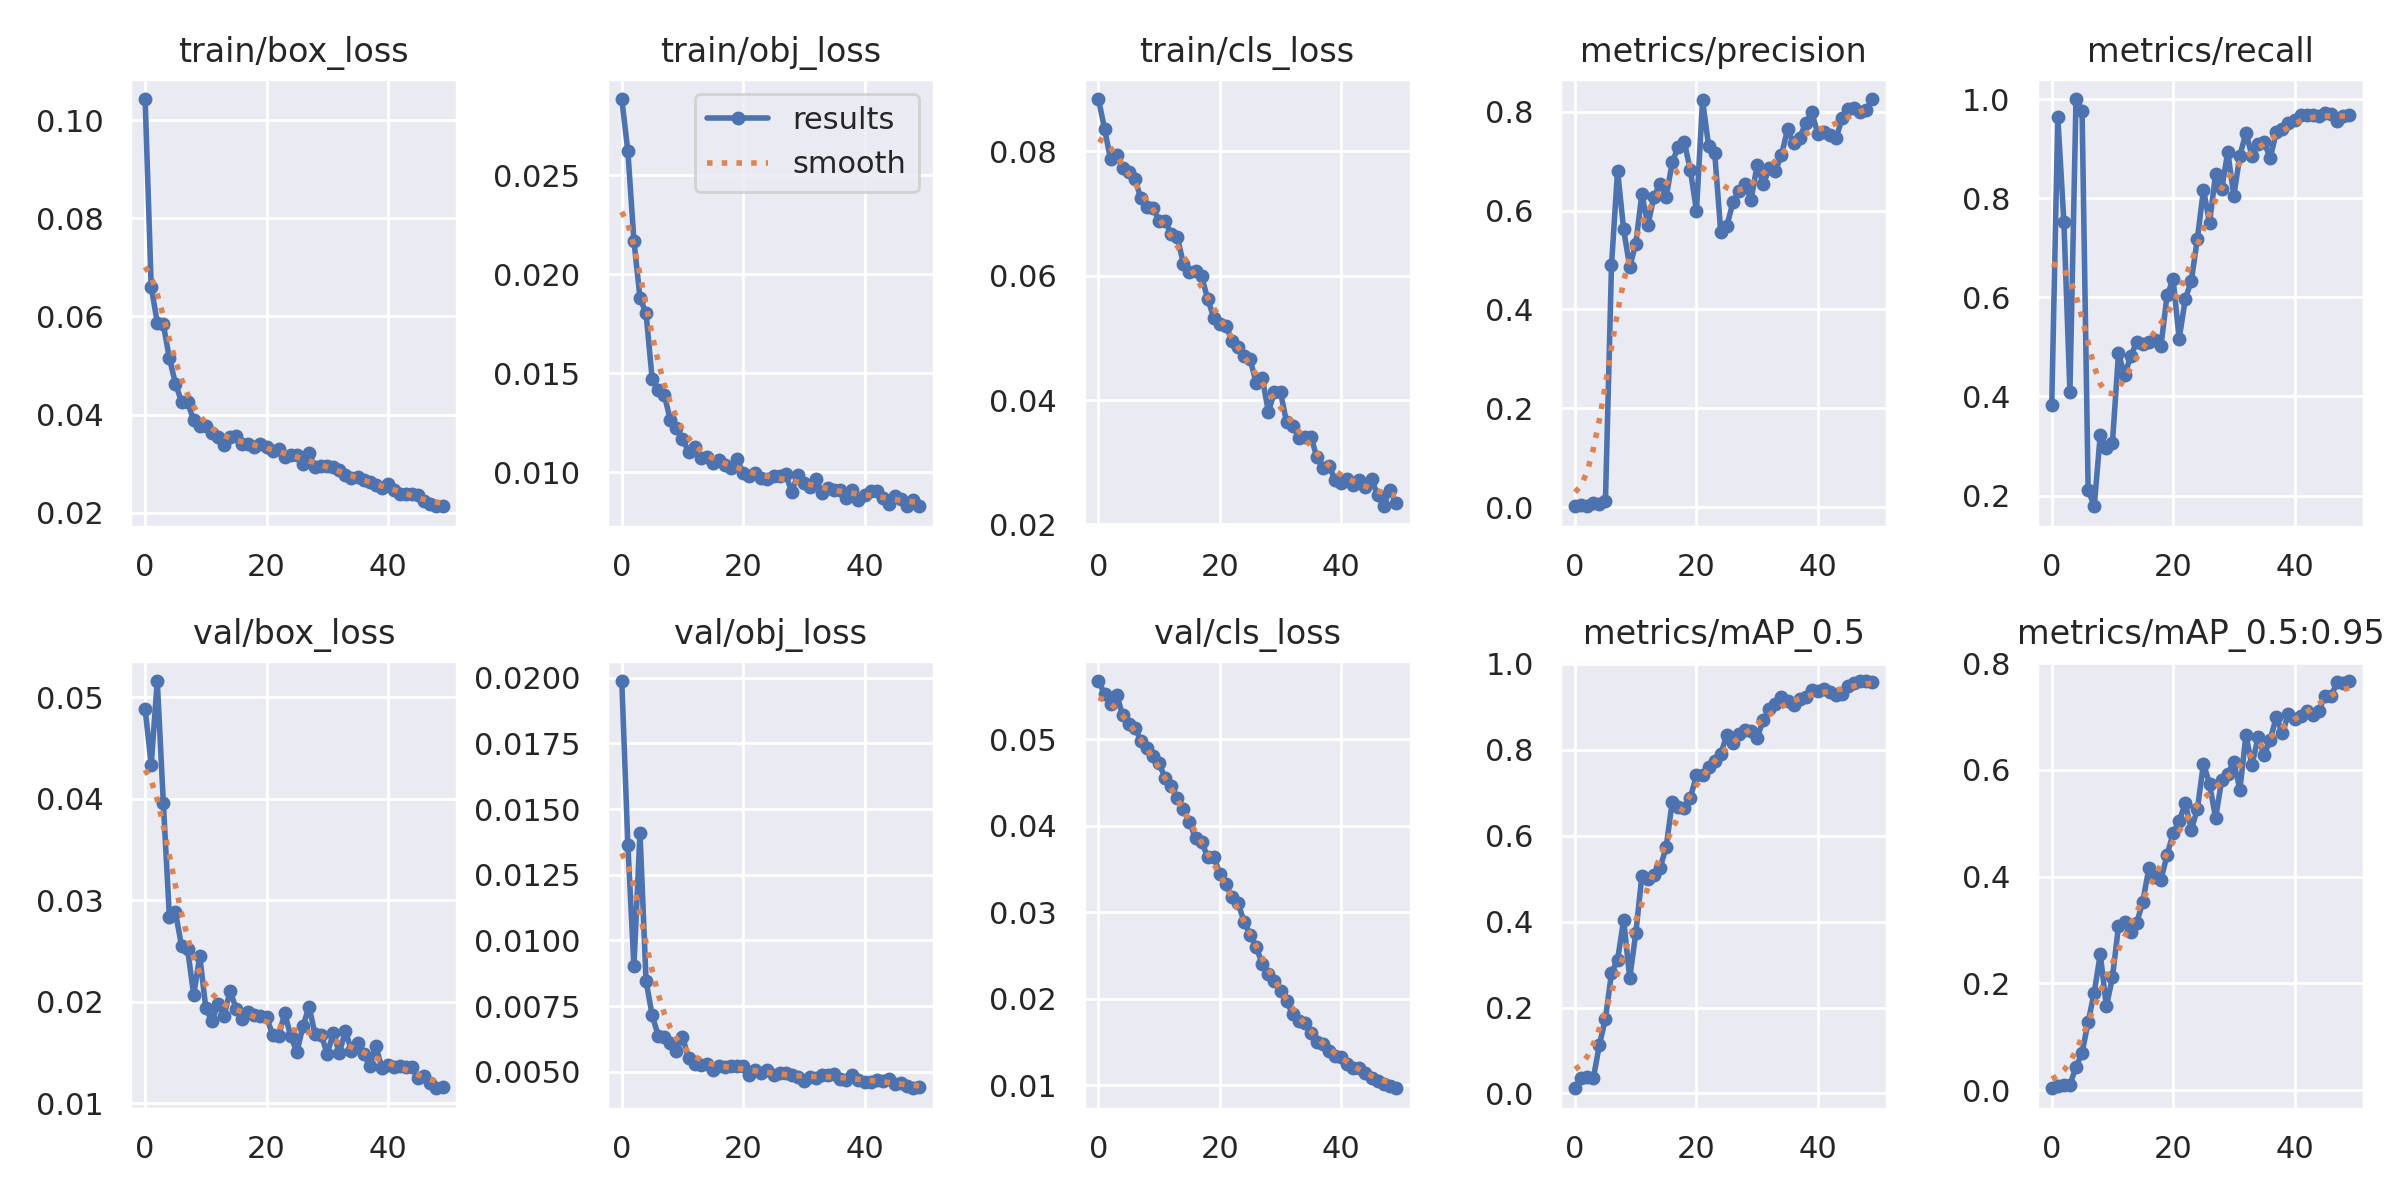

In [12]:
Image(filename='/content/yolov5/runs/train/yolov5s_results/results.png', width=1000)

Batch Training Set:


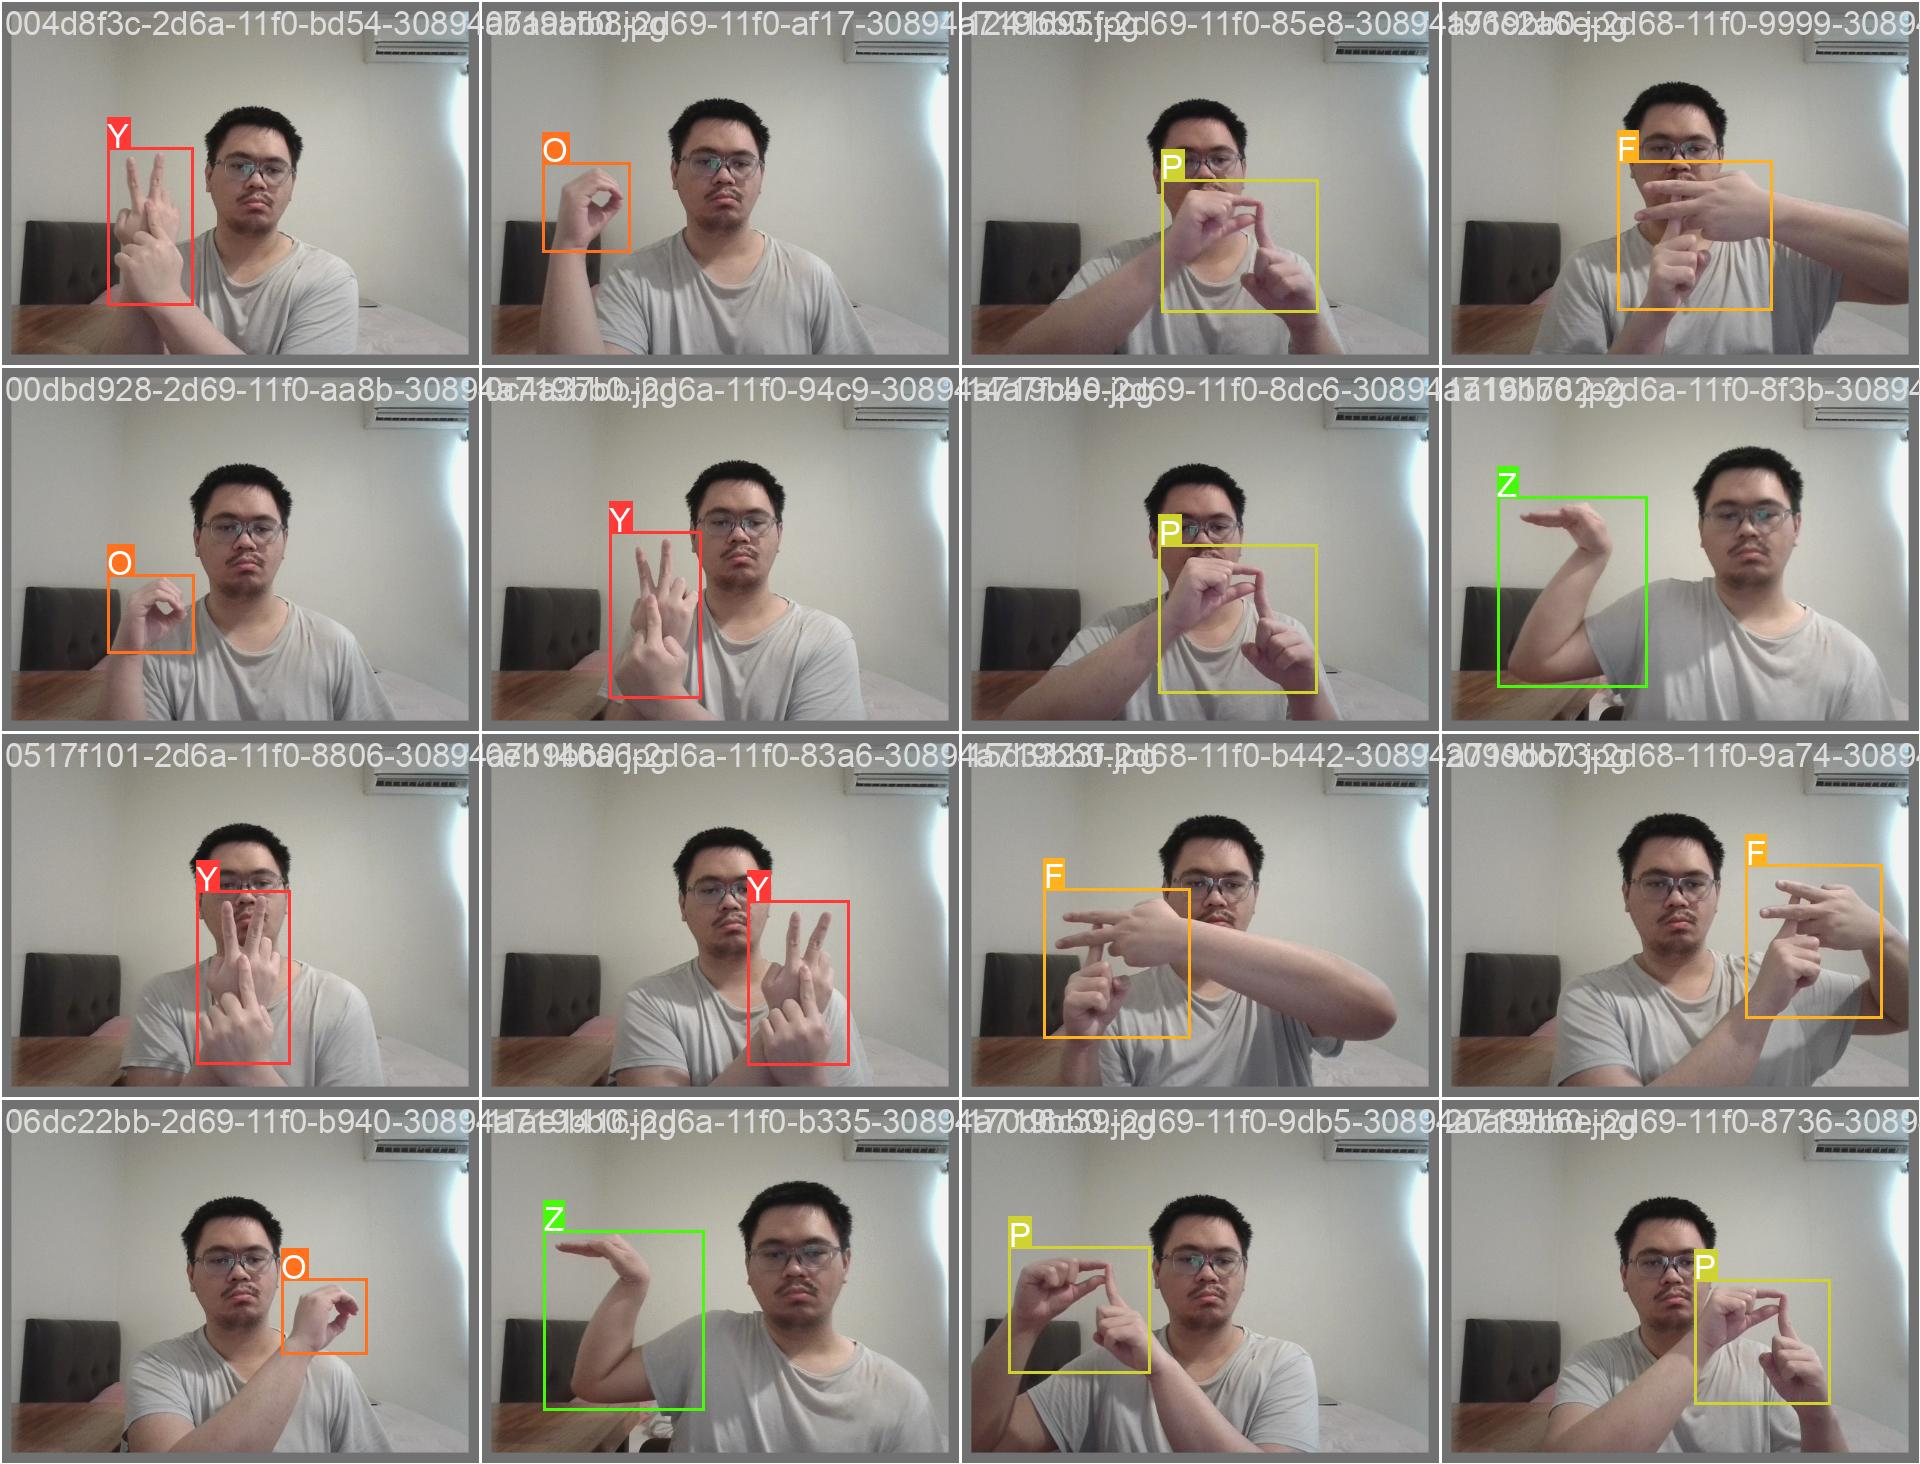

In [13]:
print("Batch Training Set:")
Image(filename='/content/yolov5/runs/train/yolov5s_results/val_batch0_labels.jpg', width=900)

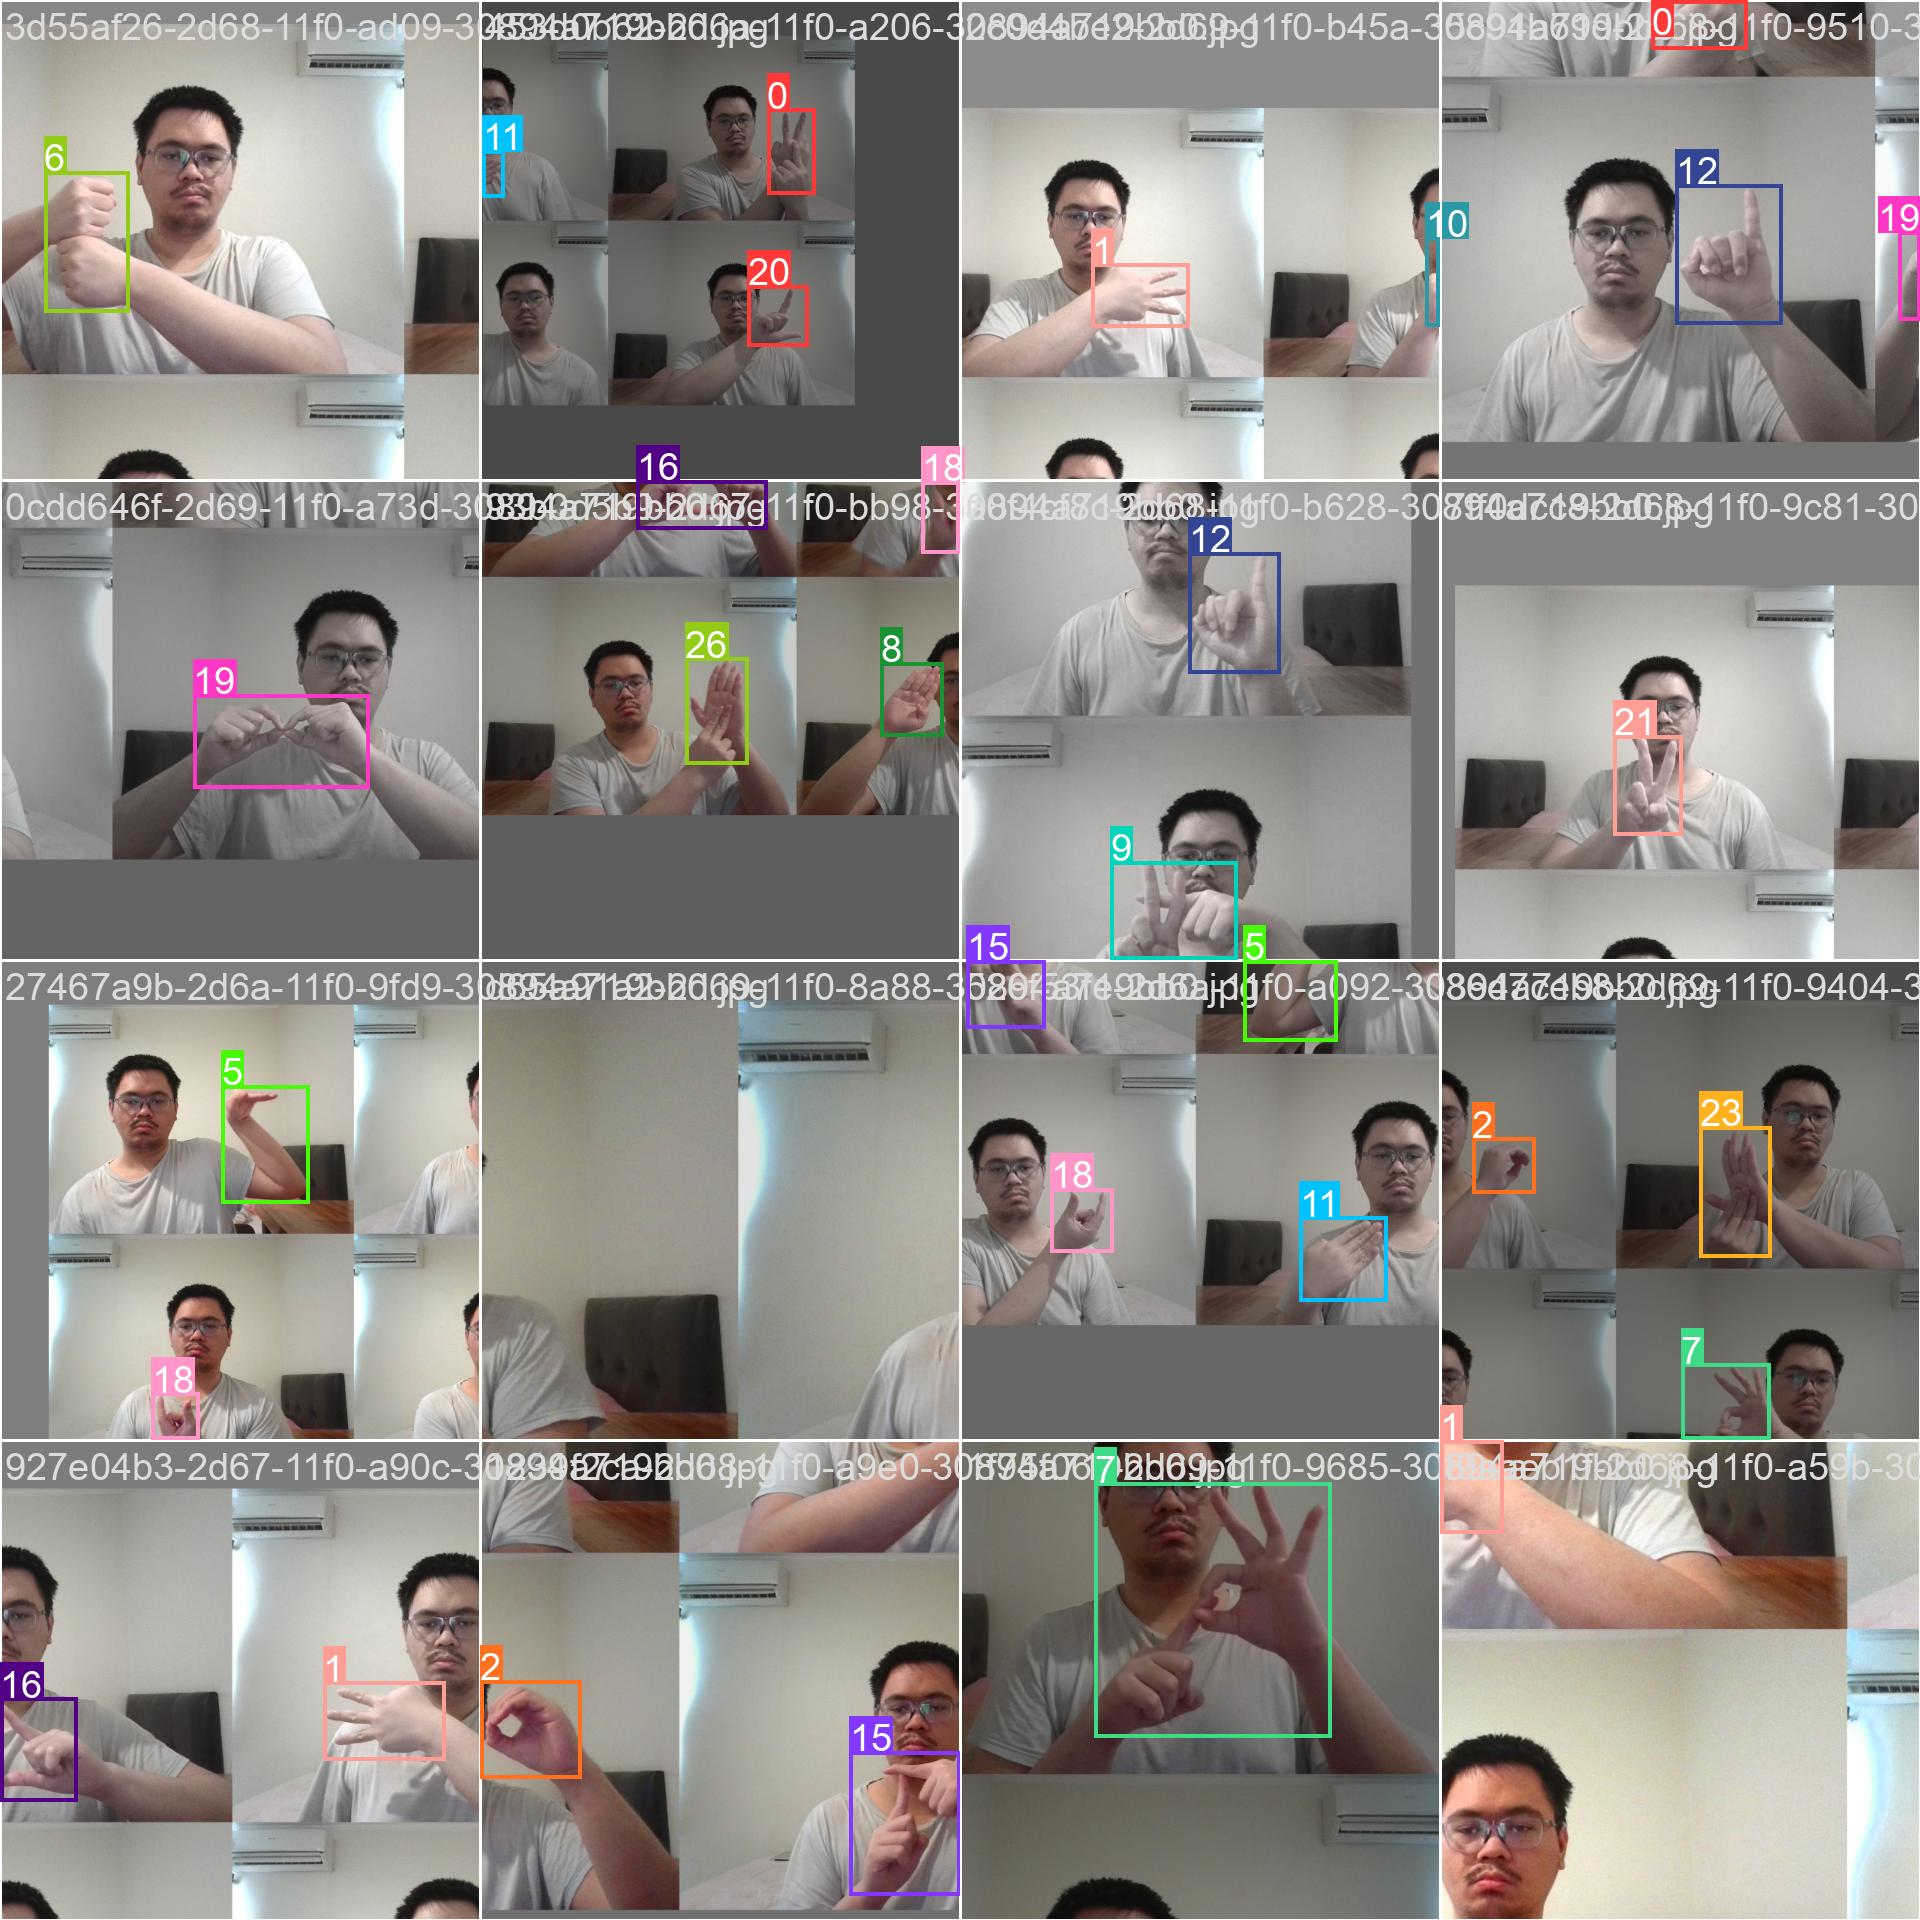

In [14]:
Image(filename='/content/yolov5/runs/train/yolov5s_results/train_batch0.jpg', width=900)

### **5. Export Model AI**

Remount Google Drive jika terputus koneksi dengan runtime.

In [23]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [24]:
%cp /content/yolov5/runs/train/yolov5s_results/weights/best.pt /content/gdrive/MyDrive/

In [31]:
import torch
from pathlib import Path

model = torch.load('/content/yolov5/runs/train/yolov5s_results/weights/best.pt', map_location='cpu')

def convert(obj):
    if isinstance(obj, dict):
        return {k: convert(v) for k, v in obj.items()}
    elif isinstance(obj, list):
        return [convert(i) for i in obj]
    elif isinstance(obj, Path):
        return str(obj)
    else:
        return obj

model = convert(model)

torch.save(model, 'best-windows-2.pt')

Run block ini untuk restart sesi dan clear storage!

In [32]:
from google.colab import files
files.download('best-windows-2.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
from google.colab import runtime
runtime.unassign()